# k-meansの実装
- 距離ベースの教師なし学習、重心座標を2点決定し、その近傍サンプルでクラスタを構成する。次そのクラスタ内に重心を移動し、再度クラスタを行う。これを繰り返す。

### データの準備

Generated data X:
[[-6.04855297 -6.42001794]
 [-3.23594765 -4.59984279]
 [ 4.50420451  6.21657771]
 [ 2.11679102 -1.6108784 ]
 [ 4.26912641  3.35829677]]
Generated data y:
[0 0 2 1 2]


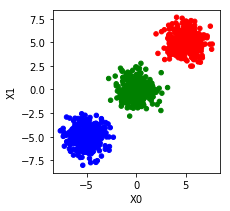

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, labels_true = make_blobs(n_samples=1000,#サンプル数
                           centers=[[-5,-5],[0,0],[5,5]],#クラスタ重心座標設定（3クラスタを2次元で作成）,
                           cluster_std=1.0, #乱数生成時の標準偏差
                           random_state=0)

print('Generated data X:')
print(X[:5])
print('Generated data y:')
print(labels_true[:5])

# hstackで横に結合、行,列=(labels_trueの個数行,1列)にreshapeしている
df = pd.DataFrame(np.hstack([X, labels_true.reshape(len(labels_true), 1)]),
                 columns=['X0', 'X1', 'label'])

col = df.label.map({0:'b', 1:'g', 2:'r'})
df.plot(x='X0', y='X1', kind='scatter', c=col, colorbar=False, figsize=(3,3))

### K-meansの実装

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 今回はクラスタ数がわかっている為、n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=0)

scl = StandardScaler()
X_std = scl.fit_transform(X)
kmeans.fit(X_std)

print(kmeans.cluster_centers_[0], ':Centroid-0 is a cluster Green')
print(kmeans.cluster_centers_[1], ':Centroid-1 is a cluster Blue')
print(kmeans.cluster_centers_[2], ':Centroid-2 is a cluster Red')

[ 0.02251074 -0.00666449] :Centroid-0 is a cluster Green
[-1.20075939 -1.18599884] :Centroid-1 is a cluster Blue
[1.18185453 1.19622489] :Centroid-2 is a cluster Red


### 未知座標Xのクラスタ番号の予測を行う

In [16]:
kmeans.predict([[-6, -4],[-2, 0], [6, 8]])

array([1, 1, 2], dtype=int32)

### kmeansのおけるクラスタ数の決定
- エルボー法

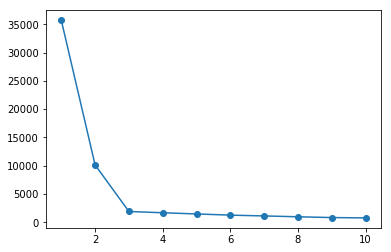

In [20]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')